<a href="https://colab.research.google.com/github/cw805/MATH-242/blob/main/Revis_PrimesProject_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Primes Project**

Math 242 - Modern Computational Mathematics


**Claire Wu** 

**Due: Friday, April 22**


This project has two parts, both involving prime numbers.

**Part 1**: Implement the Sieve of Sundaram and compare it with the Sieve of Eratosthenes. The Sieve
of Sundaram algorithm is found on page 138 in Computational Mathematics, chapter 4. Compare the runtime required for computing lists of primes with each sieve method. You should measure the runtime of each sieve for computing the primes up to n, for various n. Then make a plot that shows your results (n on the horizontal axis, runtimes on the vertical axis).


**Part 2**: Investigate at least two (three for a score of Excellent) of the following conjectures about primes. For each, either provide computational evidence in support of the conjecture, or find a counterexample showing that the conjecture is false.


To receive a grade of Excellent, your notebook should further exhibit the following:
- You investigate three of the above conjectures. For each, you either find evidence in support
of the conjecture or a counterexample that disproves it.
- Computational methodology demonstrates mastery of the computational techniques that we
have studied in this course.
- Exposition is clear and precise, thoroughly explaining your methodology and reasoning. Any assumptions necessary for the estimates are reasonable and clearly stated.
- The work may extend beyond the project requirements in a creative or insightful direction.


# Preliminary Code
First import modules:

In [ ]:
import math   # for sqrt and other math functions
import time   # for runtime analysis
import matplotlib.pyplot as plt  # for plotting
import sympy
import numpy as np

# **Part 1 - Sieve of Sundaram vs. Eratosthenes (Ch.4 p.138 )**
Compare the runtime required for computing lists of primes with each sieve method. You should 

- measure the runtime of each sieve for computing the primes up to n, for various n. 

- Then make a plot that shows your results (n on the horizontal axis, runtimes on the vertical axis).

## **Sieve of Eratosthenes**

We will implement the *fastEroatos()* function that we've been working with in class. The function will simply replace composite numbers with zero. The nonzero numbers that remain will be our list of primes.

#### Implementat fastEratos

In [ ]:
def fastEratos(nMax):
  
  # start with a list 2, 3, 4, ..., nMax
  nums = list(range(2,nMax+1))

  # compute the sqare root of nMax
  nroot = math.sqrt(nMax)

  i = 0 # index of smallest item in nums
  while nums[i] <= nroot:

    if nums[i] > 0:   # then nums[i] is prime, so set all of its multiples to zero
      j = i + nums[i]   # this index of twice the prime nums[i]
      while j < len(nums):
        nums[j] = 0
        j += nums[i]    # go to the next multiple of the prime nums[i]

    i += 1  # go to the next smallest item in nums

  # all nonzero numbers that remain in our list are prime
  primes = [n for n in nums if n != 0]
  return primes

Now we can generate a list of primes from fastEratos:

In [ ]:
fastEratos(50)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

#### Runtime of fastEratos

Now measure the runtime of this implementation. This is the function that will measure and return the runtime of fastEratos(nMax).

In [ ]:
def timeEratos(nMax):
  startTime = time.time()
  fastEratos(nMax)
  endTime = time.time()
  return endTime - startTime

In [ ]:
timeEratos(10000)

0.009406805038452148

#### Plotting Runtime of fastEratos

Now we will make a list of the `nMax` values that we will test, and then we will measure the runtimes and store them in a list. 

In [ ]:
erastosMaxVals = range(10000,100000,5000)
runtimes = [timeEratos(n) for n in erastosMaxVals]  # list comprehension -- makes a list of runtime values

With a list of nMax values, we can now plot the runtimes! For plotting in Python, we will use the `matplotlib.pyplot` module, which we imported above. 

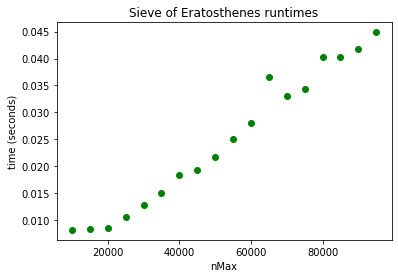

In [ ]:
plt.plot(erastosMaxVals, runtimes, 'go') # creates the plot; syntax is plot(xvals, yvals, format)
plt.title("Sieve of Eratosthenes runtimes")
plt.xlabel("nMax")
plt.ylabel("time (seconds)");

## **Sieve of Sundaram**

Now, we will repeat the same steps for the Sieve of Sundaram 

#### First, implement the Sieve of Sundaram sudo code:

In [ ]:
def sundaram(n):

  m = int((n - 1)/2)
  nums = list(range(1, m + 1))
  i = 1    
  
  while (2*i + 2*(i**2)) <= m: 
    j = i             
    w = (i + j + 2* i * j)
    while w  <= m:                   
      if w in nums:
        nums.remove(w)
      j += 1
      w = (i + j + 2* i * j) # recalculate since j changed
         
    i += 1    

  primes = [(2*b + 1) for b in nums]
  return primes

Test the function and print out the first primes up to 50:

In [ ]:
sundaram(50)

[3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

Note that this algorithm excludes "2" as a prime number, but we could always add it on manually if that's necessary.

#### Runtime of Sundaram

In [ ]:
def timeSundaram(Max):
  startTime = time.time()
  sundaram(Max)
  endTime = time.time()
  return endTime - startTime

In [ ]:
timeSundaram(10000)

0.2920386791229248

#### Plotting runtime of Sundaram

In [ ]:
SundaramMaxVals = range(10000,100000,5000)
runtimes = [timeSundaram(n) for n in SundaramMaxVals]  

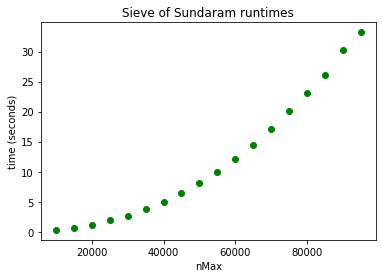

In [ ]:
plt.plot(SundaramMaxVals, runtimes, 'go') 
plt.title("Sieve of Sundaram runtimes")
plt.xlabel("nMax")
plt.ylabel("time (seconds)");

### **Comparing runtimes:**

In short, the ***Sieve of Eratosthenes is much faster than the Sieve of Sundaram.*** For up to 10,000 n values, the runtimes are:

**Sieve of Eratosthenes:** 0.0094 sec

**Sieve of Sundaram:** 0.2920 sec


Furthermore, from looking at the plots, we plotted the same intervals for both algorithms. The sieve of Eratosthenes' max time is around 0.045 seconds while Sundaram's max time is over 30 seconds.

# **Part 2: Investigate the following conjectures about primes.**
For each, either provide computational evidence in support of the conjecture, or find a counterexample showing that the conjecture is false.

**Conjecture A.** Every even integer greater than 2 is the sum of two primes.

**Conjecture C.** For every positive integer n, there exists at least one prime between $n^2$ and $(n + 1)^2$

**Conjecture D**. All odd numbers greater than 1 are either prime, or can be expressed as the sum of a prime and twice a square.

## Set up some lists for Part 2

### **isPrime** function

In [ ]:
def isPrime(n):   # test: isPrime(13)
  if n < 2:
    return False
  
  # compute the largest integer less than or equal to the square root of n
  rootn = math.floor(math.sqrt(n))

  # check for divisors of n
  for i in range(2, rootn+1):
    if n % i == 0:
      # if i divides n, then n is not prime
      return False
  
  return True



### **isOdd** and **oddsList** and faster odd

In [ ]:
def isOdd(n): # test using : isOdd(50)

  #while n > 1:
    if n % 2 == 0:
      return False
    else:
      return True

In [ ]:
OddsList = list(range(1,20, 2))

### **isEven** and evenList

In [ ]:
def isEven(n): 

  while n > 2: # specificed: even integers greater than 2
    if n % 2 == 0:
      return True
    else:
      return False

In [ ]:
evenList= list(range(2,1000,2))
# %time evens2 = list(range(2,1000,2))

## **Conjecture A.** Every even integer greater than 2 is the sum of two primes

Basic Plan for Conjecture A function:

**-input:** integers up to *evenMax*

**-iterate:** over list of even numbers, 

for each even number: 

**-Set** :
 - num = evenNums [ i ]
 - firstPrime = primeList [ p ]
 - diff = *num*  - *firstPrime*,

**-Test** if remainder is in primeList

- if yes, **Trues += 1**, **move on** to the next even integer

**Output:** Trues:123

#### Function with print statements

Sometimes when you can't go through all the nested loops very clearly in your head, it's useful to have a function that simply have a bunch of print statements. This will help make sure that the steps are functioning properly (as it should) for each step.

In [ ]:
def printIterateEven(evenMax):

  primeList = fastEratos(500000)
  evenNums = list(range(4, evenMax + 1,2)) # start loop at 4 so even numbers > 2
  Trues = 0

  i = 0
  for i in range(len(evenNums)): 
    number = evenNums[i]    
    
    for p in range(len(primeList)):
      
      print("( prime:",primeList[p],", index:",p,")" ) # print out the prime and its index
      
      if primeList[p] <= number // 2 :
          
        firstPrime = primeList[p]
        diff = number - firstPrime
                  
        if diff in primeList :            
          Trues += 1
          print("[even number:", number,", 1st Prime:",firstPrime, ", 2nd Prime:", diff, "]") # print out integer, the prime, and its index
          break
                 
  print("True count:", Trues)

In [ ]:
printIterateEven(10)

( prime: 2 , index: 0 )
[even number: 4 , 1st Prime: 2 , 2nd Prime: 2 ]
( prime: 2 , index: 0 )
( prime: 3 , index: 1 )
[even number: 6 , 1st Prime: 3 , 2nd Prime: 3 ]
( prime: 2 , index: 0 )
( prime: 3 , index: 1 )
[even number: 8 , 1st Prime: 3 , 2nd Prime: 5 ]
( prime: 2 , index: 0 )
( prime: 3 , index: 1 )
[even number: 10 , 1st Prime: 3 , 2nd Prime: 7 ]
True count: 4


#### Now we can make that into our main function!

In [ ]:
def iterateEven(evenMax):

  primeList = fastEratos(500000)
  evenNums = list(range(4, evenMax + 1,2)) 
  Trues = 0

  i = 0
  for i in range(len(evenNums)): 
    number = evenNums[i]
       
    for p in range(len(primeList)):
           
      if primeList[p] <= number // 2 :
          
        firstPrime = primeList[p]
        diff = number - firstPrime
                  
        if diff in primeList :            
          Trues += 1
          break
                 
  return Trues

In [ ]:
iterateEven(10000)

4999

### **It seems our computational evidence is in support of Conjecture A!**

We tested up to 10000 integers, which includes 5000 even integers, but we have to subtract by one for excluding the number 2. We should expect 4999 true counts for the conjecture to hold and we did!

## **Conjecture C.** For every positive integer n, there exists at least one prime between $n^2$ and $(n + 1)^2$

Basic Plan for Conjecture C function:

**-input:** numRange (positive integers), nMax  (list of primes)

**-iterate:** over list of positive integers, 

for every integer in nums
for every prime in primeList

**-Set** :
 - interval = ($n^2$ and $(n + 1)^2$)
 

**-Test** if a prime number is found in the interval

- if yes, **Trues += 1**, **break** from the loop since we only need at least one prime in the interval
- if not, **Falses += 1**

**Output:** Trues:000, Falses: 000

I started building the function by writing a couple of more simple functions to better understand how each part works so I know where my parameters are at all times when we get to the main function.

#### **First**: we write a function that takes an integer n and find if a prime number exists in the interval ($n^2$ and $(n + 1)^2$). If a prime is found, print out the first one that is found. If not, function returns false

In [ ]:
def returnPrime(n, nMax):

  primeList = fastEratos(nMax)
  interval = range(n**2, (n+1)**2)   
  
  for i in range(len(primeList)):
    i += 1
    if primeList[i] in interval:
      print("found prime:", primeList[i])
      break # since we only need at least 1, report the first prime found and exit the loop
  else:
    return False

In [ ]:
returnPrime(500,2500000)

found prime: 250007


#### **2nd**: simply switch out the print statement to "return True"

In [ ]:
def testInterval(n, nMax):

  primeList = fastEratos(nMax)
  interval = range(n**2, (n+1)**2)   
  
  for i in range(len(primeList)):
    i += 1
    if primeList[i] in interval:
      return True
      break 
  else:
    return False


In [ ]:
testInterval(200,300000)

True

#### **Final version -**

 write a function that takes the number of integers n to test the conjectrue (numRange), and a big list of prime numbers to search from (nMax). The function will return the number of n's where at least one prime is found and number of n's where no prime is found. If the function returns a false, the conjecture would be false. However, my function doesn't return the integer that is the counterexample

In [ ]:
def countTrues(numRange, nMax):
   
  primeList = fastEratos(nMax)
  nums = range(1, numRange)   
  Trues = 0
  Falses = 0
  
  for n in range(len(nums)): # for every integer in nums
    
    n += 1
    interval = range(n**2, (n+1)**2)

    for i in range(len(primeList)):
      i += 1
      if primeList[i] in interval: # if a prime number is found in the interval
        Trues += 1     # add one to Trues
        break          # since we only need to prove at at least one prime exists, go to the next n
  
    else:
      Falses += 1 # if no prime numbers found, add one to Falses
    
  return Trues, Falses

In [ ]:
countTrues(1000,100000000)

(999, 0)

### **Computational evidence is in support of Conjecture C!**

We tested 999 integers (1000 excluding zero) and for each n, there is at least one prime found (I tried to increase the number of integer's to test, but even with 5000 integers the session would crash).




## **Conjecture D**. All odd numbers greater than 1 are either prime, or can be expressed as the sum of a prime and twice a square.

Basic Plan for Conjecture D function:

**-input:** nMax  (Odd integers up to nMax)

**-iterate over:** non-prime odd integers, numbers that are "twice a square"

for every non-prime odd integers
for every twice a Square

**- if twice a square < odd integer:** (we don't want negative remainders)

**-Set** :
 - num = oddNotPrimes [ i ]
 - twiceSq = twiceSqs [ j ]
 - diff =  num - twiceSq
 
**-Test:** if diff is in primeList

- if yes, **found += 1**, **break**
- if not, **notFound += 1**, print out the number that is now a counterexample

**Output:** counterexample found: 0000,  (True count,  False count)


This conjecture has many components. We already have functions that generate lists of primes & odd numbers, and whether or not a number if prime or odd. Now, let's write a function that determines whether an interger is **"twice a square"** and generate a list from that

#### **isTwiceSq(n)** and twiceSqList

In [ ]:
def isTwiceSq(n):
 
  square = n /2
  root = math.sqrt(square)
  
  if root % 1 == 0:
    return True
  else:
    return False

def twiceSqList(nMax): 
  
  twiceSqList = []

  for n in range(1, nMax + 1): # start at 2 since all is greater than 1
      if isTwiceSq(n):
        twiceSqList.append(n)
  
  return twiceSqList

In [ ]:
twiceSqList(200)

[2, 8, 18, 32, 50, 72, 98, 128, 162, 200]

Now, the conjecture states that all odd numbers greater than 1 are either prime, or can be expressed as the sum of a prime and twice a square. We can easily eliminate the odd numbers that are also prime and focus on the ones that must have an expression as sum of a prime and twice a square for the conjecture to hold.

#### **OddNotPrime**

In [ ]:
def oddNotPrime(nMax):

  oddsList = list(range(3, nMax, 2))
  primeList = fastEratos(10000) 
  oddNotPrimes = []

  for i in range(len(oddsList)):
    odd = oddsList[i] 
    i += 1
    if isPrime(odd) == False:
      oddNotPrimes.append(odd)

  return oddNotPrimes

In [ ]:
oddNotPrime(50)

[9, 15, 21, 25, 27, 33, 35, 39, 45, 49]

#### **main function**

In [ ]:
def twiceSquarePrime(nMax):

  oddNotPrimes = oddNotPrime(nMax)
  twiceSqs = twiceSqList(100000) # set it manually so there won't be 3 different user input max values
  primeList = fastEratos(100000) # also set manually
  found = 0
  notFound = 0

  for i in range(len(oddNotPrimes)):
    num = oddNotPrimes[i]
                  
    for j in range(len(twiceSqs)): 
      twiceSq = twiceSqs[j]
      
      if twiceSq < num:
      
        twiceSq = twiceSqs[j]
        diff =  num - twiceSq

        if diff in primeList:     
          found += 1      
          break                        
        
      else:
        notFound += 1
        print("counterexample found:", num)
        break
     
                
  return found, notFound

In [ ]:
twiceSquarePrime(10000)

counterexample found: 5777
counterexample found: 5993


(3769, 2)

### According to the algorithm, there are in fact **2 counterexamples: 5777 and 5993** that shows that the **conjecture is false!**